In [22]:
import pandas as pd
import numpy as np
import psycopg2
import decimal

from sqlalchemy import create_engine

import matplotlib.pyplot as plt

import seaborn as sns

In [23]:

upper_pc_threshold = 0.04
lower_pc_threshold = 0.04

days_before_action = 4

start_date = pd.to_datetime('2010-01-01').date()
end_date = pd.to_datetime('2021-12-31').date()

ma_days =[12, 15, 18, 20 ,23 ]

# set plot size 
sns.set(rc={'figure.figsize':(18, 12)})

# show more rows
pd.set_option('display.max_rows', None)

In [24]:


POSTGRES_ADDRESS = '192.168.1.27'
POSTGRES_PORT = '5433' 
POSTGRES_USERNAME = 'root' 
POSTGRES_PASSWORD = 'password' 
POSTGRES_DBNAME = 'pystock' 

postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'
                .format(username=POSTGRES_USERNAME, 
                        password=POSTGRES_PASSWORD, 
                        ipaddress=POSTGRES_ADDRESS, 
                        port=POSTGRES_PORT, 
                        dbname=POSTGRES_DBNAME)) 
# Create the connection 
cnx = create_engine(postgres_str)
pg_prices=pd.read_sql_query('''SELECT * FROM inputs.prices WHERE ticker = 'AAF.L' AND price_date BETWEEN '2010-01-01' AND '2024-12-10';''', cnx)
prices=pg_prices.sort_values(by=['price_date'])
prices = prices.set_index('price_date')

In [25]:
prices.head()

ticker  high_price  low_price  open_price  close_price      volume  \
price_date                                                                      
2019-06-28  AAF.L       58.80      51.17       58.80        51.78  64367704.0   
2019-07-01  AAF.L       56.79      51.97       51.97        54.22  16286773.0   
2019-07-02  AAF.L       55.37      54.98       55.08        54.98   3565649.0   
2019-07-03  AAF.L       55.75      55.01       55.75        55.06   6511595.0   
2019-07-04  AAF.L       55.84      55.18       55.84        55.29    269558.0   

            dividends  stock_splits      retrieved_date  
price_date                                               
2019-06-28        0.0           0.0 2024-12-08 10:02:24  
2019-07-01        0.0           0.0 2024-12-08 10:02:24  
2019-07-02        0.0           0.0 2024-12-08 10:02:24  
2019-07-03        0.0           0.0 2024-12-08 10:02:24  
2019-07-04        0.0           0.0 2024-12-08 10:02:24

ticker  high_price  low_price  open_price  close_price      volume  \
price_date                                                                      
2019-06-28  AAF.L       58.80      51.17       58.80        51.78  64367704.0   
2019-07-01  AAF.L       56.79      51.97       51.97        54.22  16286773.0   
2019-07-02  AAF.L       55.37      54.98       55.08        54.98   3565649.0   
2019-07-03  AAF.L       55.75      55.01       55.75        55.06   6511595.0   
2019-07-04  AAF.L       55.84      55.18       55.84        55.29    269558.0   
2019-07-05  AAF.L       56.51      55.29       55.31        55.98   3240264.0   
2019-07-08  AAF.L       56.50      55.37       55.98        55.69   4795152.0   
2019-07-09  AAF.L       55.75      55.37       55.75        55.37   1505361.0   
2019-07-10  AAF.L       55.71      54.98       55.40        54.98   3195083.0   
2019-07-11  AAF.L       55.37      54.98       55.06        54.98    723072.0   
2019-07-12  AAF.L       54.98      54.60       54.98        54.60   2414976.0   
2019-07-15  AAF.L       55.06      54.64       54.95        54.64    258309.0   
2019-07-16  AAF.L       54.91      54.60       54.60        54.76    544072.0   
2019-07-17  AAF.L       54.83      54.03       54.64        54.07   1559200.0   
2019-07-18  AAF.L       54.11      53.27       54.11        53.46   2009704.0   
2019-07-19  AAF.L       54.18      53.38       54.03        53.80    201213.0   
2019-07-22  AAF.L       53.99      53.27       53.65        53.61    825163.0   
2019-07-23  AAF.L       53.38      52.92       53.34        53.08   2088489.0   
2019-07-24  AAF.L       53.42      52.92       53.34        53.08   1497731.0   
2019-07-25  AAF.L       53.15      52.58       53.08        53.08    824964.0   
2019-07-26  AAF.L       54.18      52.31       53.99        52.31   1004050.0   
2019-07-29  AAF.L       53.08      52.08       53.04        53.08    274267.0   
2019-07-30  AAF.L       53.08      52.08       53.08        52.69    285799.0   
2019-07-31  AAF.L       52.69      52.26       52.69        52.62     66584.0   
2019-08-01  AAF.L       53.04      52.20       52.69        52.73    539334.0   
2019-08-02  AAF.L       54.60      51.97       54.60        52.35    753783.0   
2019-08-05  AAF.L       53.23      50.40       53.23        51.55   1779142.0   
2019-08-06  AAF.L       51.93      50.78       51.93        51.17    295951.0   
2019-08-07  AAF.L       51.74      51.17       51.17        51.17    507740.0   
2019-08-08  AAF.L       51.93      51.20       51.93        51.55   1022027.0   

            dividends  stock_splits      retrieved_date  min    max  
price_date                                                           
2019-06-28        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-01        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-02        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-03        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-04        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-05        0.0           0.0 2024-12-08 10:02:24  NaN  55.98  
2019-07-08        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-09        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-10        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-11        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-12        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-15        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-16        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-17        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-18        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-19        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-22        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-23        0.0           0.0 2024-12-08 10:02:24  NaN    NaN  
2019-07-24        

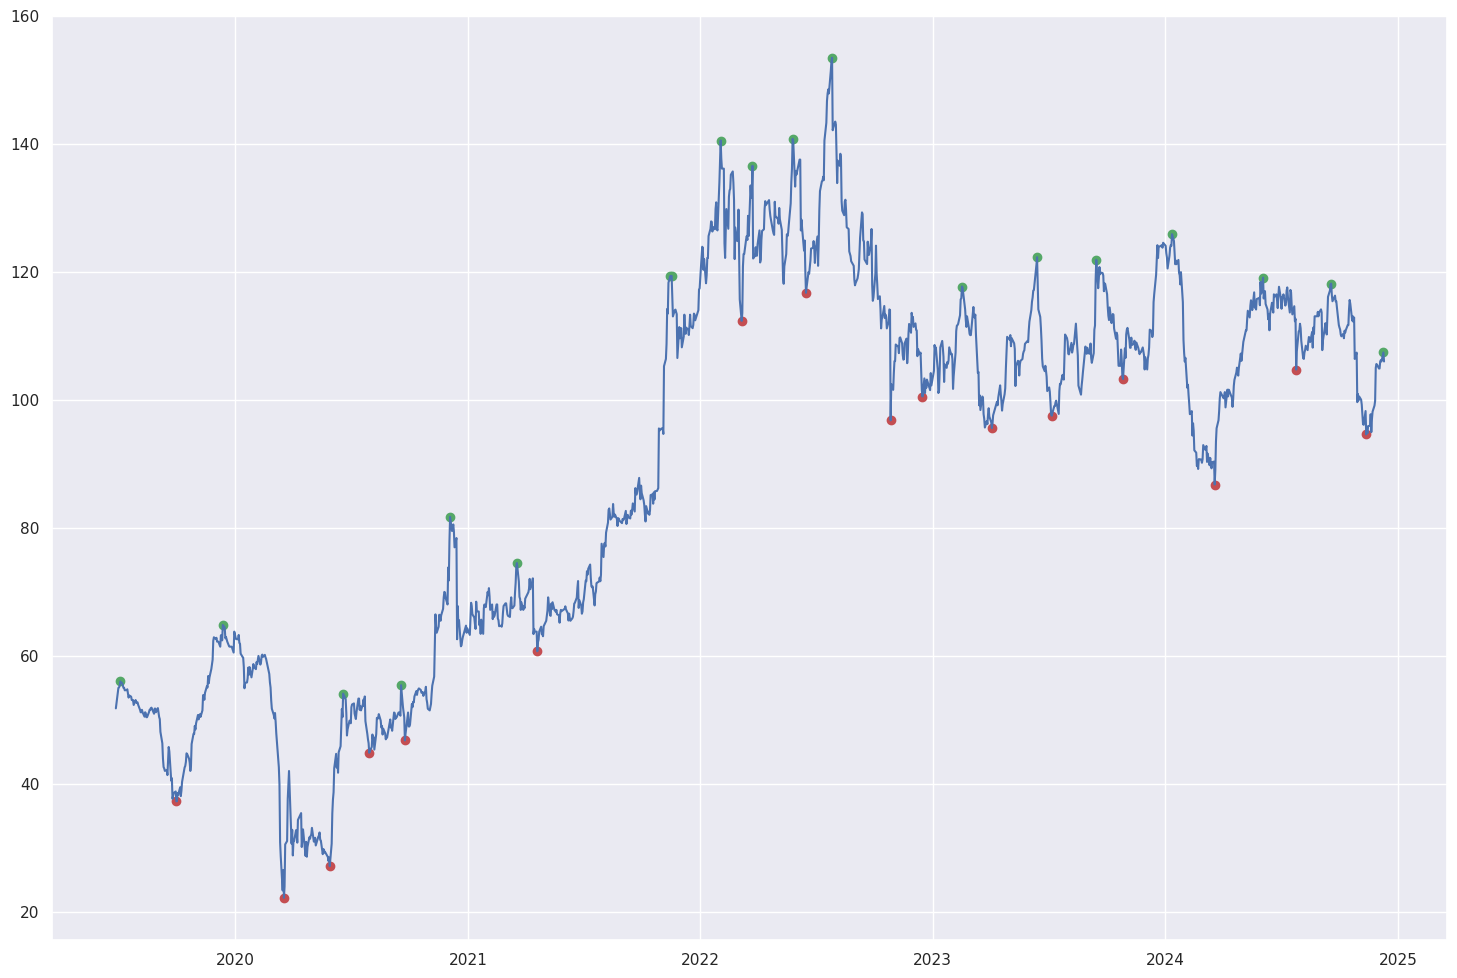

In [26]:

import matplotlib.pyplot as plt

from scipy.signal import argrelextrema

# Generate a noisy AR(1) sample

np.random.seed(0)
rs = np.random.randn(200)
xs = [0]
for r in rs:
    xs.append(xs[-1] * 0.9 + r)
df = pd.DataFrame(xs, columns=['data'])

df = prices

n = 30  # number of points to be checked before and after

# Find local peaks

df['min'] = df.iloc[argrelextrema(df.close_price.values, np.less_equal,
                    order=n)[0]]['close_price']
df['max'] = df.iloc[argrelextrema(df.close_price.values, np.greater_equal,
                    order=n)[0]]['close_price']

# Plot results

plt.scatter(df.index, df['min'], c='r')
plt.scatter(df.index, df['max'], c='g')
plt.plot(df.index, df['close_price'])
#plt.show()

df.head(30)
